# Stacked Spikeplot
Useful for "pooling" the results of multiple regression models.

I used three machine learning models to predict future climate changed by country, and made spikeplots for each model showing accuracy, in which blue represents an overprediction and red represents an underprediction. 

In this visualization I overlaid the spikes atop each other. Thus a single vertical axis represents a single country. A darker color represents a larger error. Borders are added, so that each prediction can be seen distinctly from the others.

I attached a picture below of the final visualization as the code to create it would be too much to post here. Refer to my Climate Change project for more context. 

In [ ]:
# Create a spike plot of all three models
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.cm as cm
import matplotlib.colors as mcolors
import matplotlib.lines as mlines
%matplotlib inline

# Create a figure
plt.figure(figsize=(12, 6))

# Aggregate all prediction errors
prediction_errors = np.concatenate([
    linreg_results['Prediction error'],
    gbr_results['Prediction error'],
    rfr_results['Prediction error']
])

# Actual values (assuming they are the same across models)
x_actual = np.tile(np.array(gbr_results["Actual warming trend"]), 3)  # Repeat for all models

# Lists to store overpredictions and underpredictions
overprediction_errors = prediction_errors[prediction_errors > 0]
underprediction_errors = prediction_errors[prediction_errors < 0]

# Compute statistics correctly
num_overpredictions = len(overprediction_errors)
num_underpredictions = len(underprediction_errors)

mean_overestimation_error = overprediction_errors.sum() / num_overpredictions if num_overpredictions > 0 else 0
mean_underestimation_error = underprediction_errors.sum() / num_underpredictions if num_underpredictions > 0 else 0

median_overprediction_error = np.median(overprediction_errors) if num_overpredictions > 0 else 0
median_underprediction_error = np.median(underprediction_errors) if num_underpredictions > 0 else 0

# Normalize errors for color mapping
if num_overpredictions > 0:
    norm_over = mcolors.Normalize(vmin=overprediction_errors.min(), vmax=overprediction_errors.max())
if num_underpredictions > 0:
    norm_under = mcolors.Normalize(vmin=abs(underprediction_errors).min(), vmax=abs(underprediction_errors).max())

# Plot vertical spike lines with color gradient
for error, actual in zip(prediction_errors, x_actual):
    predicted = actual + error
    abs_error = abs(error)
    
    if error > 0:
        color = cm.Reds(norm_over(abs_error))  # Darker red for larger errors
    else:
        color = cm.Blues(norm_under(abs_error))  # Darker blue for larger errors
    
    # Thin black border
    plt.vlines(x=actual, ymin=actual, ymax=predicted, color='black', linewidth=3.5, alpha=1)
    
    # Main spike line with varying shade
    plt.vlines(x=actual, ymin=actual, ymax=predicted, color=color, linewidth=2)

# Create custom legend handles
red_line = mlines.Line2D([], [], color='darkred', lw=2, 
    label=f'Overpredictions \n Total {num_overpredictions} \n Mean error {mean_overestimation_error:.3f} °C \n Median error {median_overprediction_error:.3f} °C')

blue_line = mlines.Line2D([], [], color='darkblue', lw=2, 
    label=f'Underpredictions \n Total {num_underpredictions} \n Mean error {mean_underestimation_error:.3f} °C \n Median error {median_underprediction_error:.3f} °C')

# Add main legend to the top left
main_legend = plt.legend(handles=[red_line, blue_line], loc='upper left')
plt.gca().add_artist(main_legend)  # Ensure main legend stays

# Labels and title
plt.xlabel('Actual warming trend')
plt.ylabel('Predicted warming trend')
plt.title('Spike plot of aggregated prediction errors \n across all three models')

# Show plot
plt.show()

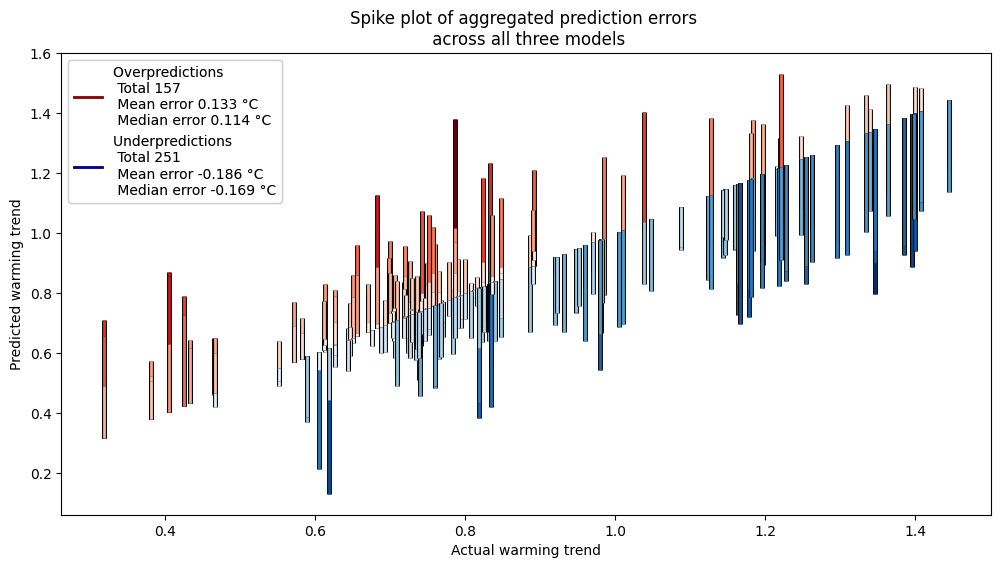